In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
raw_data = pd.read_csv('data-clean/cleaned_crime_dataset.csv')
raw_data['OCCURRED_ON_DATE'] = pd.to_datetime(raw_data['OCCURRED_ON_DATE']) # convert to datetime object
print(raw_data.shape)

# # drop rows missing lat/long info
# raw_data = raw_data.dropna(subset=["Lat"])
# raw_data = raw_data.drop(index = raw_data[(raw_data['Lat'] < 42)].index.values)

# drop first column (indices)
raw_data = raw_data.drop(columns=["Unnamed: 0"])
raw_data.reset_index(drop=True,inplace=True)
print(raw_data.shape)
display(raw_data.head())

(453493, 18)
(453493, 17)


,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,TESTTEST2,423,NaN,ASSAULT,External,,0,2019-10-16 00:00:00,2019,10,Wednesday,0,NaN,RIVERVIEW DR,NaN,NaN,"(0.00000000, 0.00000000)"
1,S97333701,3301,NaN,VERBAL DISPUTE,C6,915,0,2020-07-18 14:34:00,2020,7,Saturday,14,NaN,MARY BOYLE WAY,42.330813,-71.051368,"(42.33081300, -71.05136800)"
2,S47513131,2647,NaN,THREATS TO DO BODILY HARM,E18,530,0,2020-06-24 10:15:00,2020,6,Wednesday,10,NaN,READVILLE ST,42.239491,-71.135954,"(42.23949100, -71.13595400)"
3,I92102201,3301,NaN,VERBAL DISPUTE,E13,583,0,2019-12-20 03:08:00,2019,12,Friday,3,NaN,DAY ST,42.325122,-71.107779,"(42.32512200, -71.10777900)"
4,I92097173,3115,NaN,INVESTIGATE PERSON,C11,355,0,2019-10-23 00:00:00,2019,10,Wednesday,0,NaN,GIBSON ST,42.297555,-71.059709,"(42.29755500, -71.05970900)"


In [34]:
print(raw_data['OCCURRED_ON_DATE'].min())
print(raw_data['OCCURRED_ON_DATE'].max())

2015-06-15 00:00:00
2020-11-01 05:19:00


In [51]:
raw_data.dtypes

INCIDENT_NUMBER                object
OFFENSE_CODE                    int64
OFFENSE_CODE_GROUP             object
OFFENSE_DESCRIPTION            object
DISTRICT                       object
REPORTING_AREA                 object
SHOOTING                       object
OCCURRED_ON_DATE       datetime64[ns]
YEAR                            int64
MONTH                           int64
DAY_OF_WEEK                    object
HOUR                            int64
UCR_PART                       object
STREET                         object
Lat                           float64
Long                          float64
Location                       object
dtype: object

In [45]:
# separate 2020 data
crime_past = raw_data[(raw_data['YEAR'] != 2020)]
crime_curr = raw_data[(raw_data['YEAR'] == 2020)]
print(f"2015-2019 incidents: {len(crime_past)}")
print(f"2020 incidents: {len(crime_curr)}")

2015-2019 incidents: 390066
2020 incidents: 63427


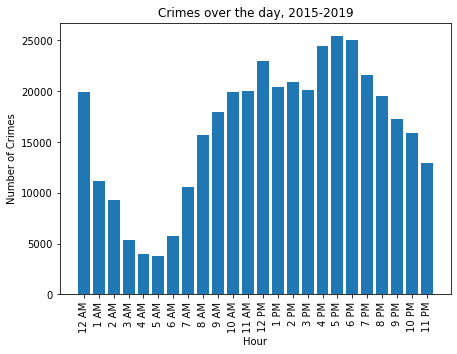

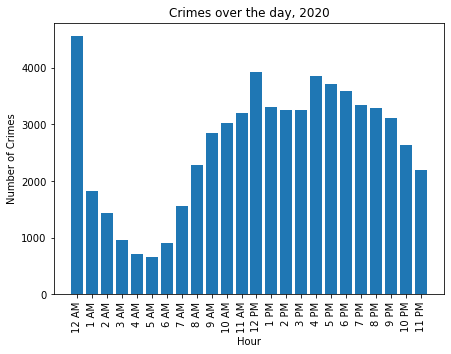

In [46]:
# plot crimes vs time of day
def crime_hour(df, title):
    x = df['HOUR'].value_counts().index.values
    labels = []
    for i in range(24):
        if i == 0:
            labels.append("12 AM")
        elif i == 12:
            labels.append("12 PM")
        elif i < 12:
            labels.append(str(i)+" AM")
        elif i > 12:
            labels.append(str(i-12) + " PM")
    plt.figure(figsize=[7,5])
    plt.bar(x, df['HOUR'].value_counts())
    plt.xticks(ticks=range(24), labels=labels, rotation=90)
    plt.xlabel('Hour')
    plt.ylabel('Number of Crimes')
    plt.title(title)
    plt.show()
crime_hour(crime_past, "Crimes over the day, 2015-2019")
crime_hour(crime_curr, "Crimes over the day, 2020")

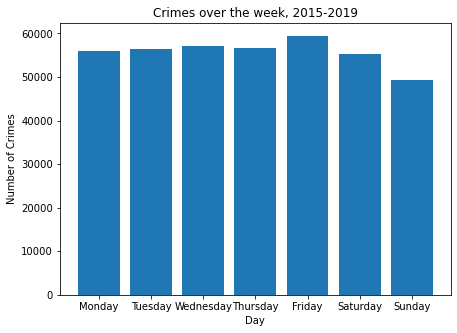

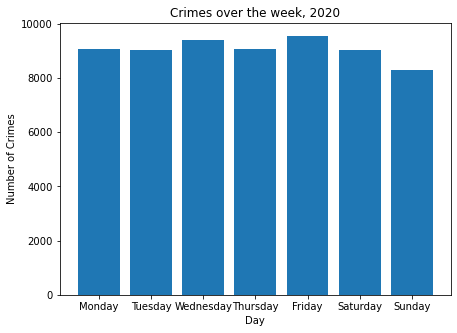

In [47]:
# plot crime over week
def crime_week(df, title):
    counts = df['DAY_OF_WEEK'].value_counts()
    days = df['DAY_OF_WEEK'].value_counts().index.values
    idx=[days.tolist().index(d) for d in ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']]

    plt.figure(figsize=[7,5])
    plt.bar(days[idx],counts[idx])
    plt.xlabel('Day')
    plt.ylabel('Number of Crimes')
    plt.title(title)
    plt.show()

crime_week(crime_past, "Crimes over the week, 2015-2019")
crime_week(crime_curr, "Crimes over the week, 2020")

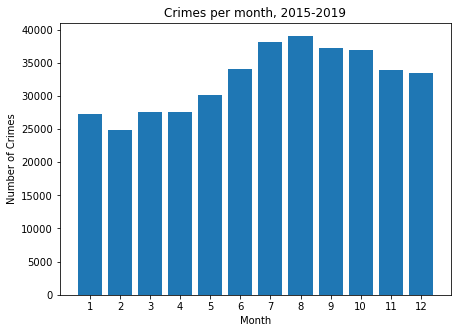

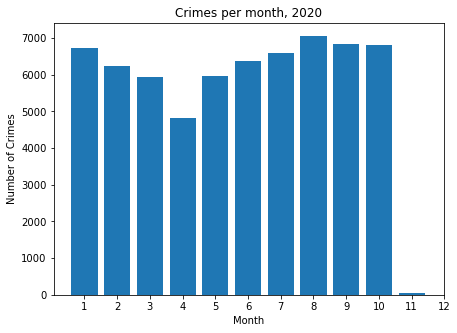

In [48]:
# plot crime over month
def crime_month(df, title):
    plt.figure(figsize=[7,5])
    plt.bar(df['MONTH'].value_counts().index.values, df['MONTH'].value_counts())
    plt.xticks(ticks=range(1,13))
    plt.xlabel('Month')
    plt.ylabel('Number of Crimes')
    plt.title(title)
    plt.show()

crime_month(crime_past, "Crimes per month, 2015-2019")
crime_month(crime_curr, "Crimes per month, 2020")

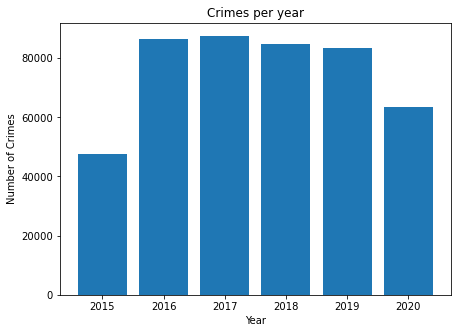

In [50]:
plt.figure(figsize=[7,5])
plt.bar(raw_data['YEAR'].value_counts().index.values, raw_data['YEAR'].value_counts())
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.title('Crimes per year')
plt.show()

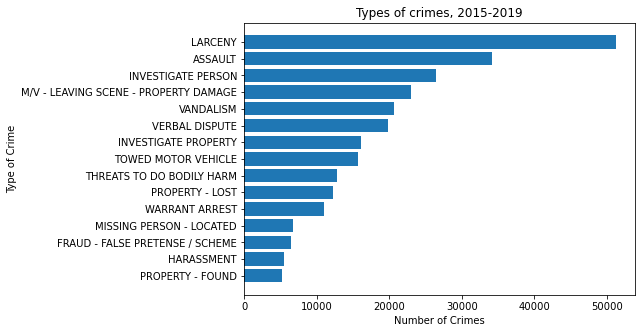

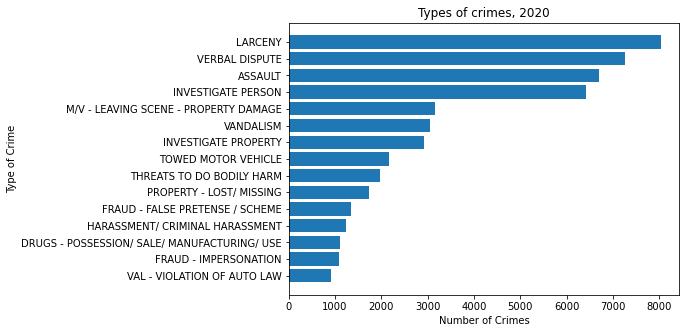

In [65]:
def crime_type(df, title):
    data = df['OFFENSE_DESCRIPTION'].value_counts().head(15)[::-1]
    plt.figure(figsize=[7,5])
    plt.barh(data.index.values, data)
    plt.ylabel('Type of Crime')
    plt.xlabel('Number of Crimes')
    plt.title(title)
    # plt.xticks(rotation=90)
    plt.show()

crime_type(crime_past, "Types of crimes, 2015-2019")
crime_type(crime_curr, "Types of crimes, 2020")